In [27]:
import numpy as np

In [32]:
def binomial_option_pricing(S, K, T, r, sigma, steps, option_type="call"):
    """
    Binomial Option Pricing Model for European Options.

    Parameters:
    S (float): Initial stock price
    K (float): Strike price
    T (float): Time to maturity (in years)
    r (float): Risk-free interest rate (annualized)
    sigma (float): Volatility of the underlying asset (annualized)
    steps (int): Number of time steps in the binomial tree
    option_type (str): Type of the option - "call" or "put"

    Returns:
    float: Option price
    """

    # Step 1: Calculate parameters
    dt = T / steps                      # Time step size
    u = np.exp(sigma * np.sqrt(dt))     # Upward movement factor
    d = 1 / u                           # Downward movement factor
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability
    discount = np.exp(-r * dt)          # Discount factor per step

    # Step 2: Initialize asset prices at maturity
    prices = np.array([S * (u ** j) * (d ** (steps - j)) for j in range(steps + 1)])

    # Step 3: Initialize option values at maturity
    if option_type == "call":
        option_values = np.maximum(0, prices - K)
    elif option_type == "put":
        option_values = np.maximum(0, K - prices)
    else:
        raise ValueError("Invalid option type. Choose 'call' or 'put'.")

     # Step 4: Backward induction to calculate the option price
    for _ in range(steps):
        option_values = discount * (p * option_values[1:] + (1 - p) * option_values[:-1])

    return option_values[0]


In [34]:
# Example usage
if __name__ == "__main__":
    # Parameters for the option
    # this values are of KOTAKBANK options as on 20th Jan, 2025
    S = 1918       # Initial stock price
    K = 1960       # Strike price
    T = 10 / 365         # Time to maturity (1 year)
    r = 0.07      # Risk-free interest rate (5%)
    sigma = 0.24   # Volatility (20%)
    steps = 10  # Number of time steps

    # Calculate the option price for a call
    call_price = binomial_option_pricing(S, K, T, r, sigma, steps, option_type="call")
    print(f"European Call Option Price: {call_price:.4f}")


European Call Option Price: 15.2215


## According to binomial model, the price of the option is 15.22.
## But the option is trading at 16.65, so the option is overvalued.

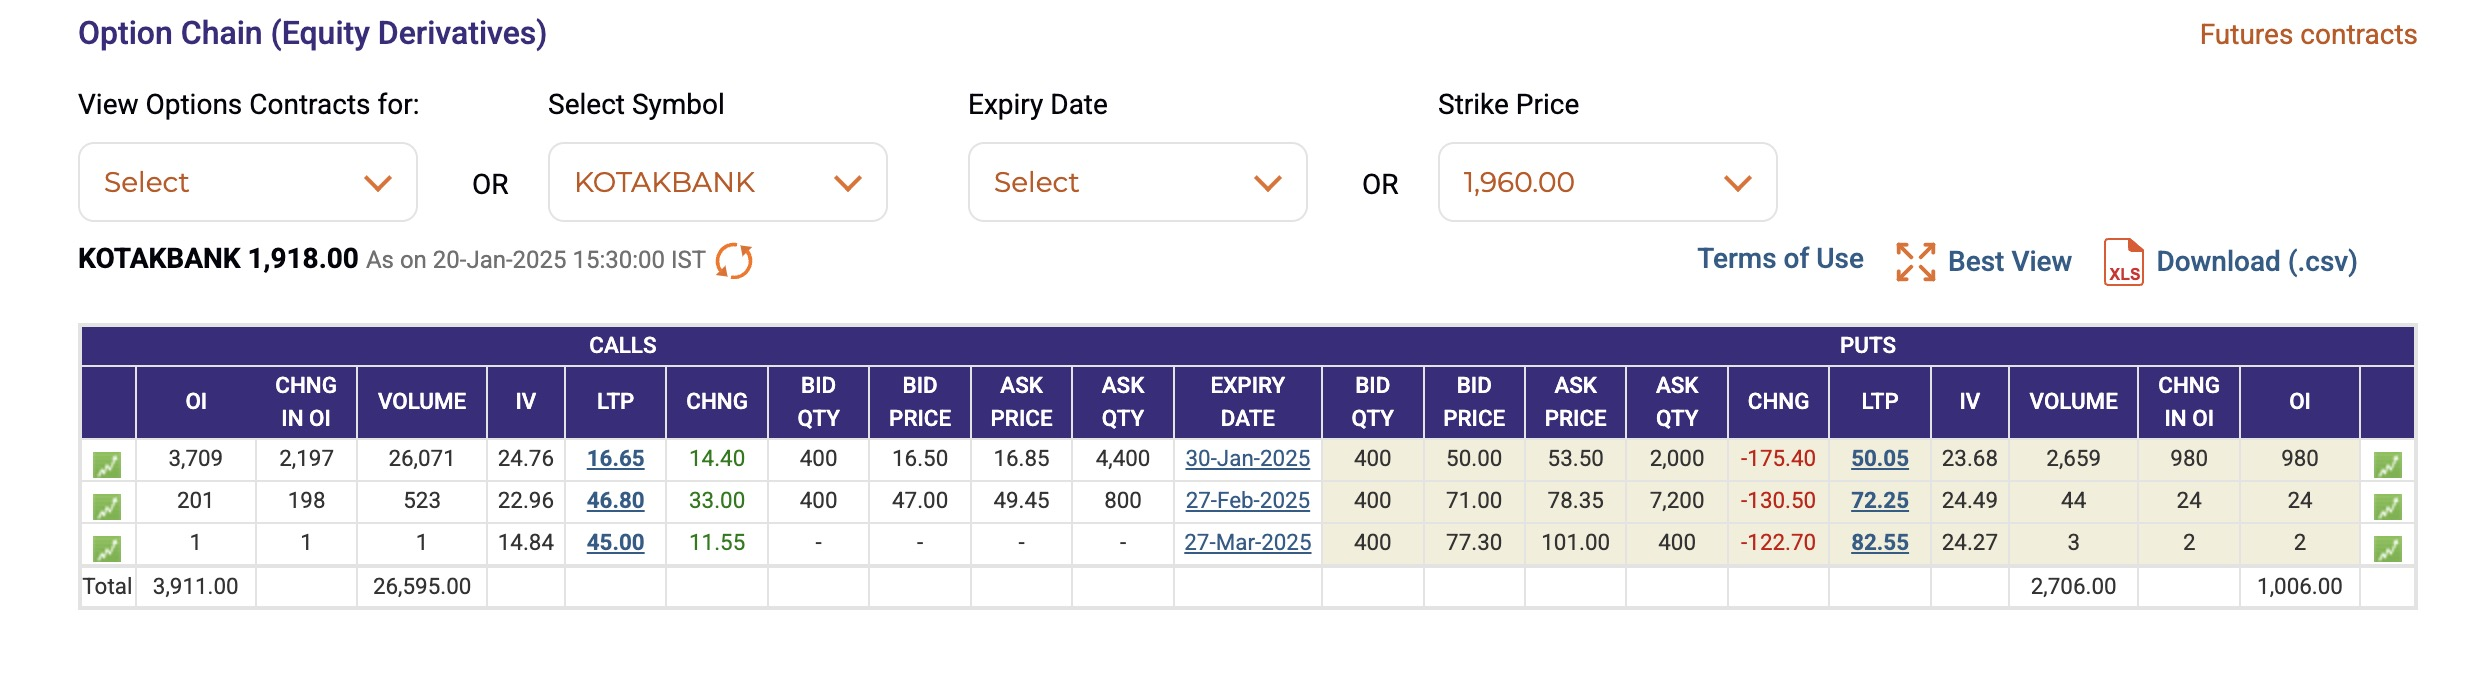